In [5]:
# Importo librerias

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot
from scipy.stats import chi2_contingency, mannwhitneyu
import warnings 
warnings.filterwarnings('ignore')

In [6]:
# Abro dataset
df = pd.read_csv("../data/marketing_campaign_clean.csv")
df.head(3)

,Age,Education,Marital_Status,Income,Kids,Dt_Customer,Recency,Complain,Wines,Fruits,...,Acc_Cmp1,Acc_Cmp2,Acc_Cmp3,Acc_Cmp4,Acc_Cmp5,Response,Store,Catalog,Webs,Web_Visist
0,67,Graduate,Single,58138.0,0,2012-09-04,58,False,635,88,...,False,False,False,False,False,True,4,10,8,7
1,70,Graduate,Single,46344.0,2,2014-03-08,38,False,11,1,...,False,False,False,False,False,False,2,1,1,5
2,59,Graduate,Together,71613.0,0,2013-08-21,26,False,426,49,...,False,False,False,False,False,False,10,2,8,4


# 4.1 ANALISIS UNIVARIANTE

In [8]:
# voy a organizar las listas variables por categorias, que puedan estar relacionadas

cat_1_PEOPLE = ["Education","Marital_Status","Kids"]
cat_2_PROMO = ["Acc_Cmp1","Acc_Cmp2","Acc_Cmp3", "Acc_Cmp4", "Acc_Cmp5", "Response"]
cat_3_OTHER = ["Complain"] # no me aporta mucho de momento

num_1_PEOPLE = ["Age","Income", "Recency"]
num_2_PRODUCT = ["Wines","Fruits", "Meat", "Fish", "Sweets", "Gold", "Total_Spent"]
num_3_PLACE = ["Store", "Catalog", "Webs","Web_Visist"]
num_4_PROMO = ["Deals"]
num_5_PEOPLE_2 = ["Dt_Customer"] 

In [9]:
# 4.1.1. Estadísticos de centralidad 
# 4.1.2. Estadísticos de dispersión
# Variables numericas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2233.0,55.107479,11.697927,28.0,47.0,54.0,65.0,84.0
Income,2233.0,52212.770264,25057.339402,1730.0,35441.0,51381.5,68281.0,666666.0
Kids,2233.0,0.951635,0.752170,0.0,0.0,1.0,1.0,3.0
Recency,2233.0,49.142409,28.948483,0.0,24.0,49.0,74.0,99.0
Wines,2233.0,303.933274,336.854130,0.0,24.0,173.0,505.0,1493.0
Fruits,2233.0,26.239140,39.703732,0.0,1.0,8.0,33.0,199.0
Meat,2233.0,166.891178,225.724334,0.0,16.0,67.0,232.0,1725.0
Fish,2233.0,37.402597,54.447473,0.0,3.0,12.0,50.0,259.0
Sweets,2233.0,27.087326,41.314436,0.0,1.0,8.0,33.0,263.0
Gold,2233.0,43.827138,51.865500,0.0,9.0,24.0,56.0,362.0


In [10]:
# 4.1.1. Estadísticos de centralidad
# Variables cat_1_PEOPLE

df[cat_1_PEOPLE].mode().T

,0
Education,Graduate
Marital_Status,Together
Kids,1


In [11]:
# 4.1.2. Estadísticos de dispersión
# Coeficiente de Variacion
df.describe().loc[["std","mean"]].T

,std,mean
Age,11.697927,55.107479
Income,25057.339402,52212.770264
Kids,0.752170,0.951635
Recency,28.948483,49.142409
Wines,336.854130,303.933274
Fruits,39.703732,26.239140
Meat,225.724334,166.891178
Fish,54.447473,37.402597
Sweets,41.314436,27.087326
Gold,51.865500,43.827138


In [12]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"] / df_var["mean"] 
    return df_var

variabilidad(df)

,std,mean,CV
Age,11.697927,55.107479,0.212275
Income,25057.339402,52212.770264,0.479908
Kids,0.752170,0.951635,0.790398
Recency,28.948483,49.142409,0.589073
Wines,336.854130,303.933274,1.108316
Fruits,39.703732,26.239140,1.513149
Meat,225.724334,166.891178,1.352524
Fish,54.447473,37.402597,1.455714
Sweets,41.314436,27.087326,1.525231
Gold,51.865500,43.827138,1.183411


In [13]:
# CATEGORICAS

#### PEOPLE: EDUCATION , MARITAL_STATUS y KIDS

Frecuencas ASBSOLUTAS


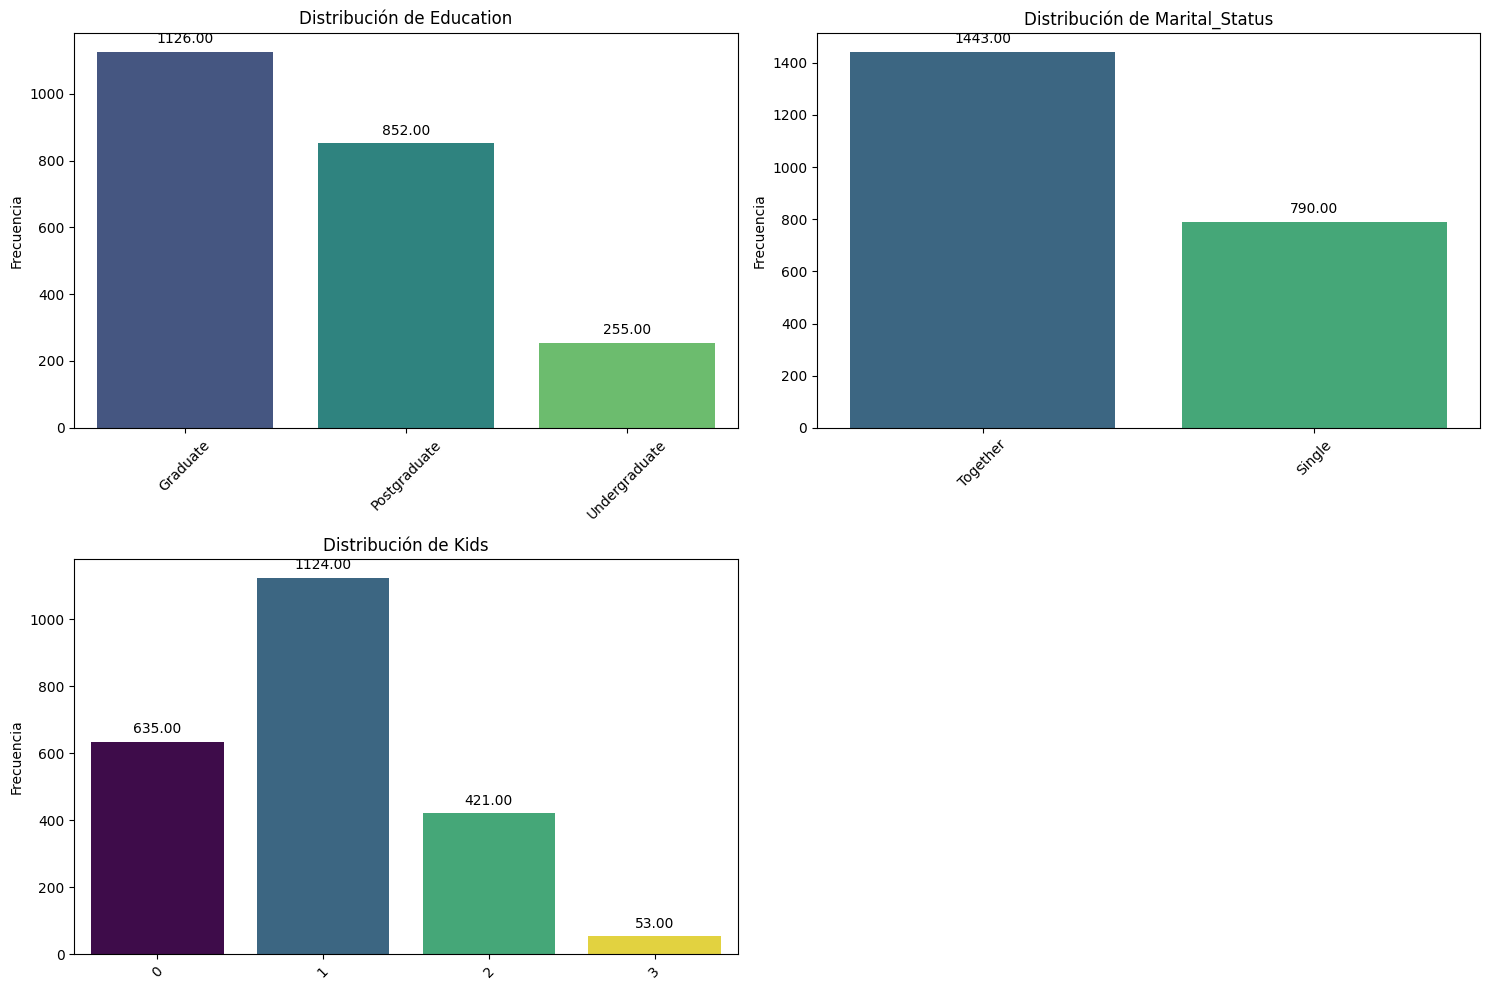

Frecuencas RELATIVAS


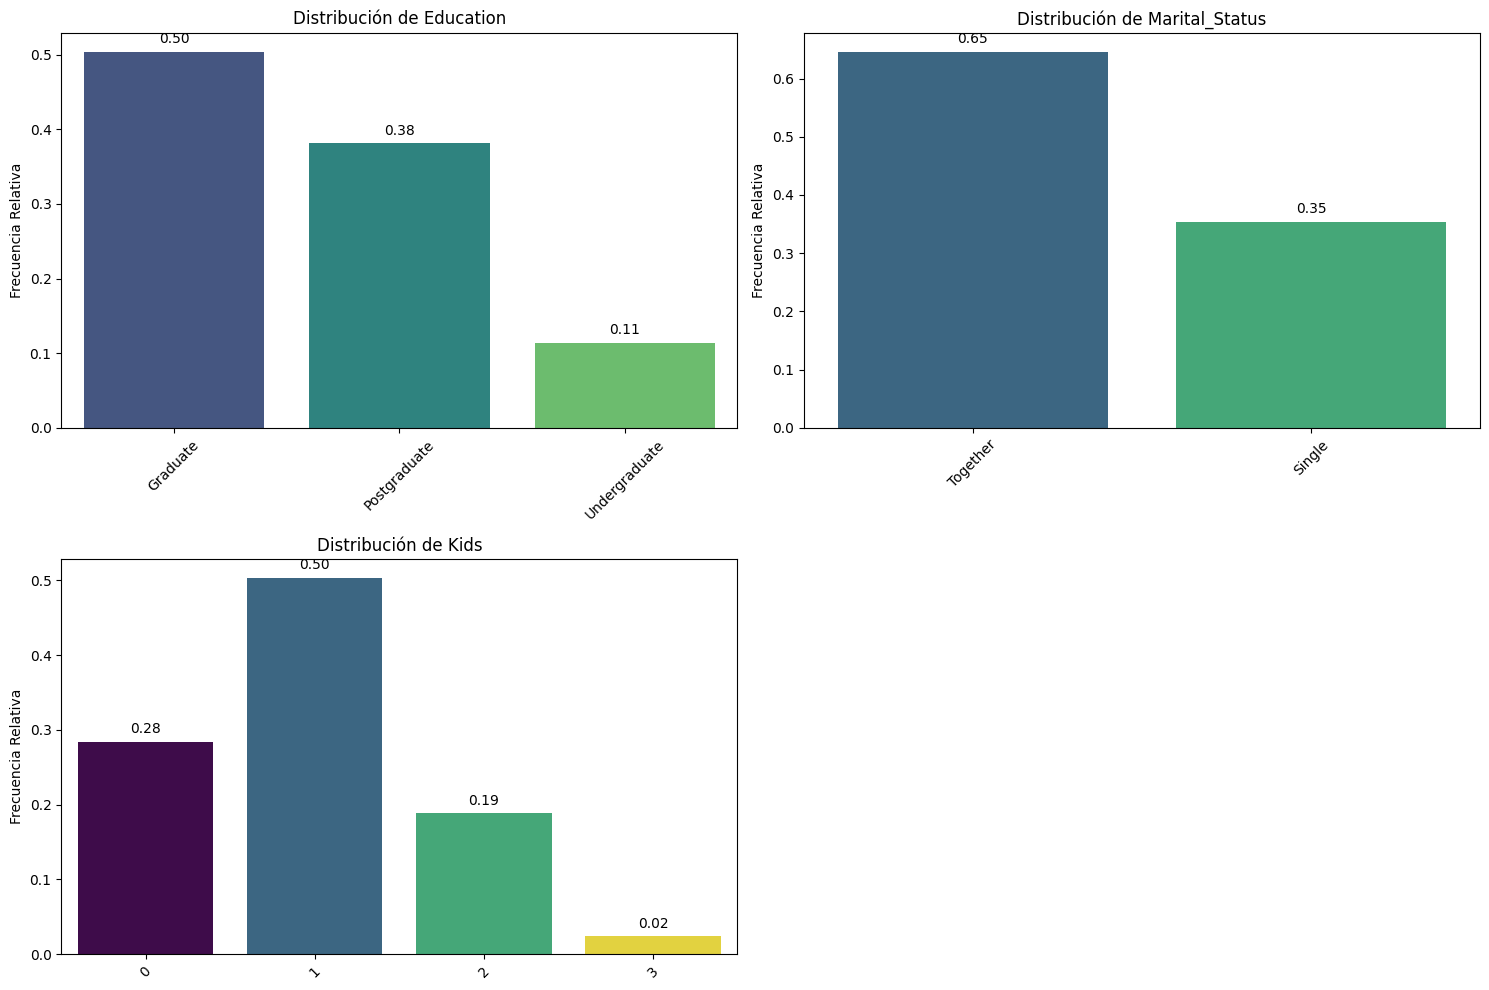

In [14]:
# 4.1.3 Gráficos por variable categoricas_v1

print("Frecuencas ASBSOLUTAS")
pinta_distribucion_categoricas(df, cat_1_PEOPLE, mostrar_valores= True)

print("Frecuencas RELATIVAS")
pinta_distribucion_categoricas(df, cat_1_PEOPLE, relativa=True,mostrar_valores= True)

***Education***:
- El % de urndergraduate es solo del 11%. Lo que significa que el 89% tienen estudios
- El 38% postgrado (alto-alto), 50% graduados (alto-medio), 11% estudios basicos (bajos)

***Marital Status***
- Un 65 % vive en pareja

***Kids***
- El 28% no tiene hijos frente al 78% que si. En concreto el 50% tiene solamente un hijo

#### PROMO: ACC_CMP1, ACC_CMP2, ACC_CMP3, ACC_CMP4, ACC_CMP5, RESPONSE

Frecuencas ASBSOLUTAS


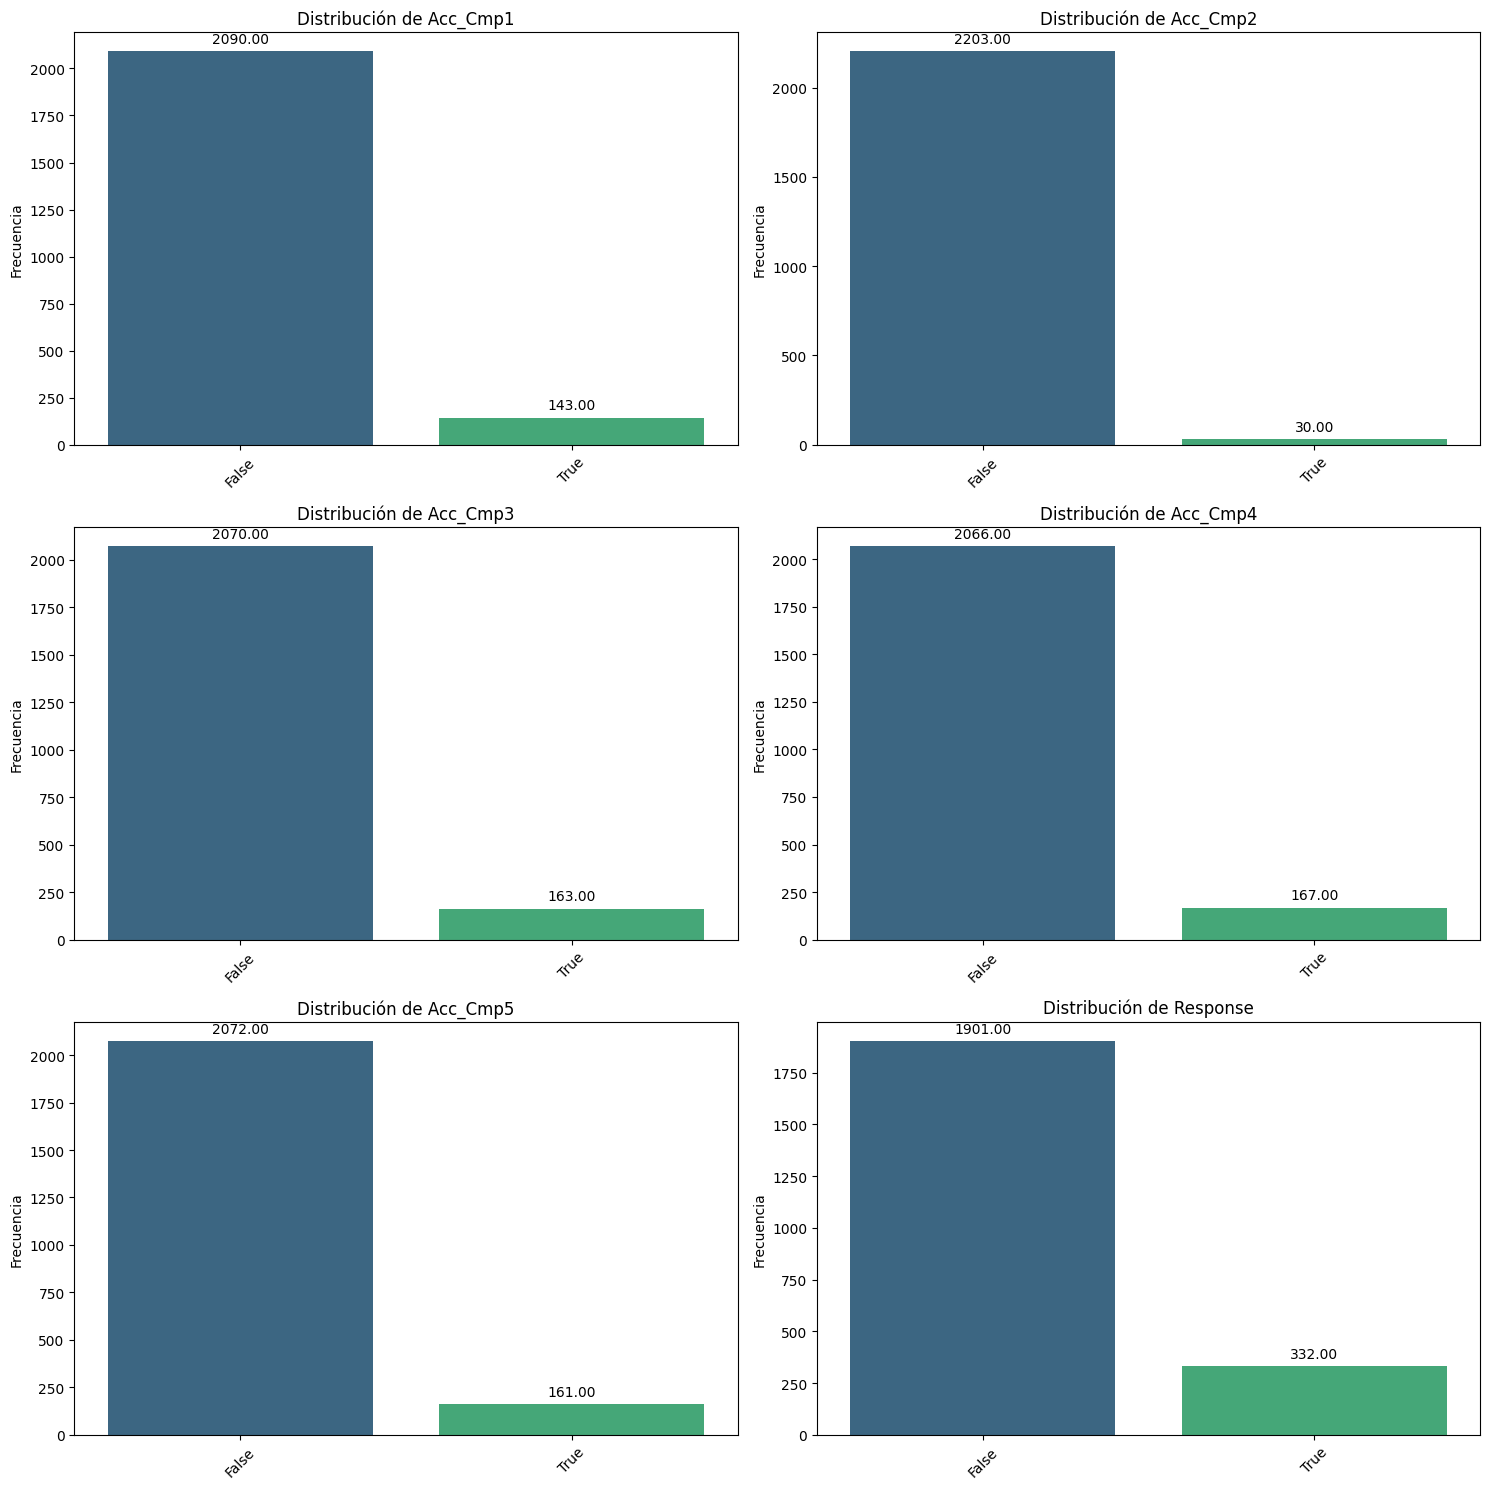

Frecuencas RELATIVAS


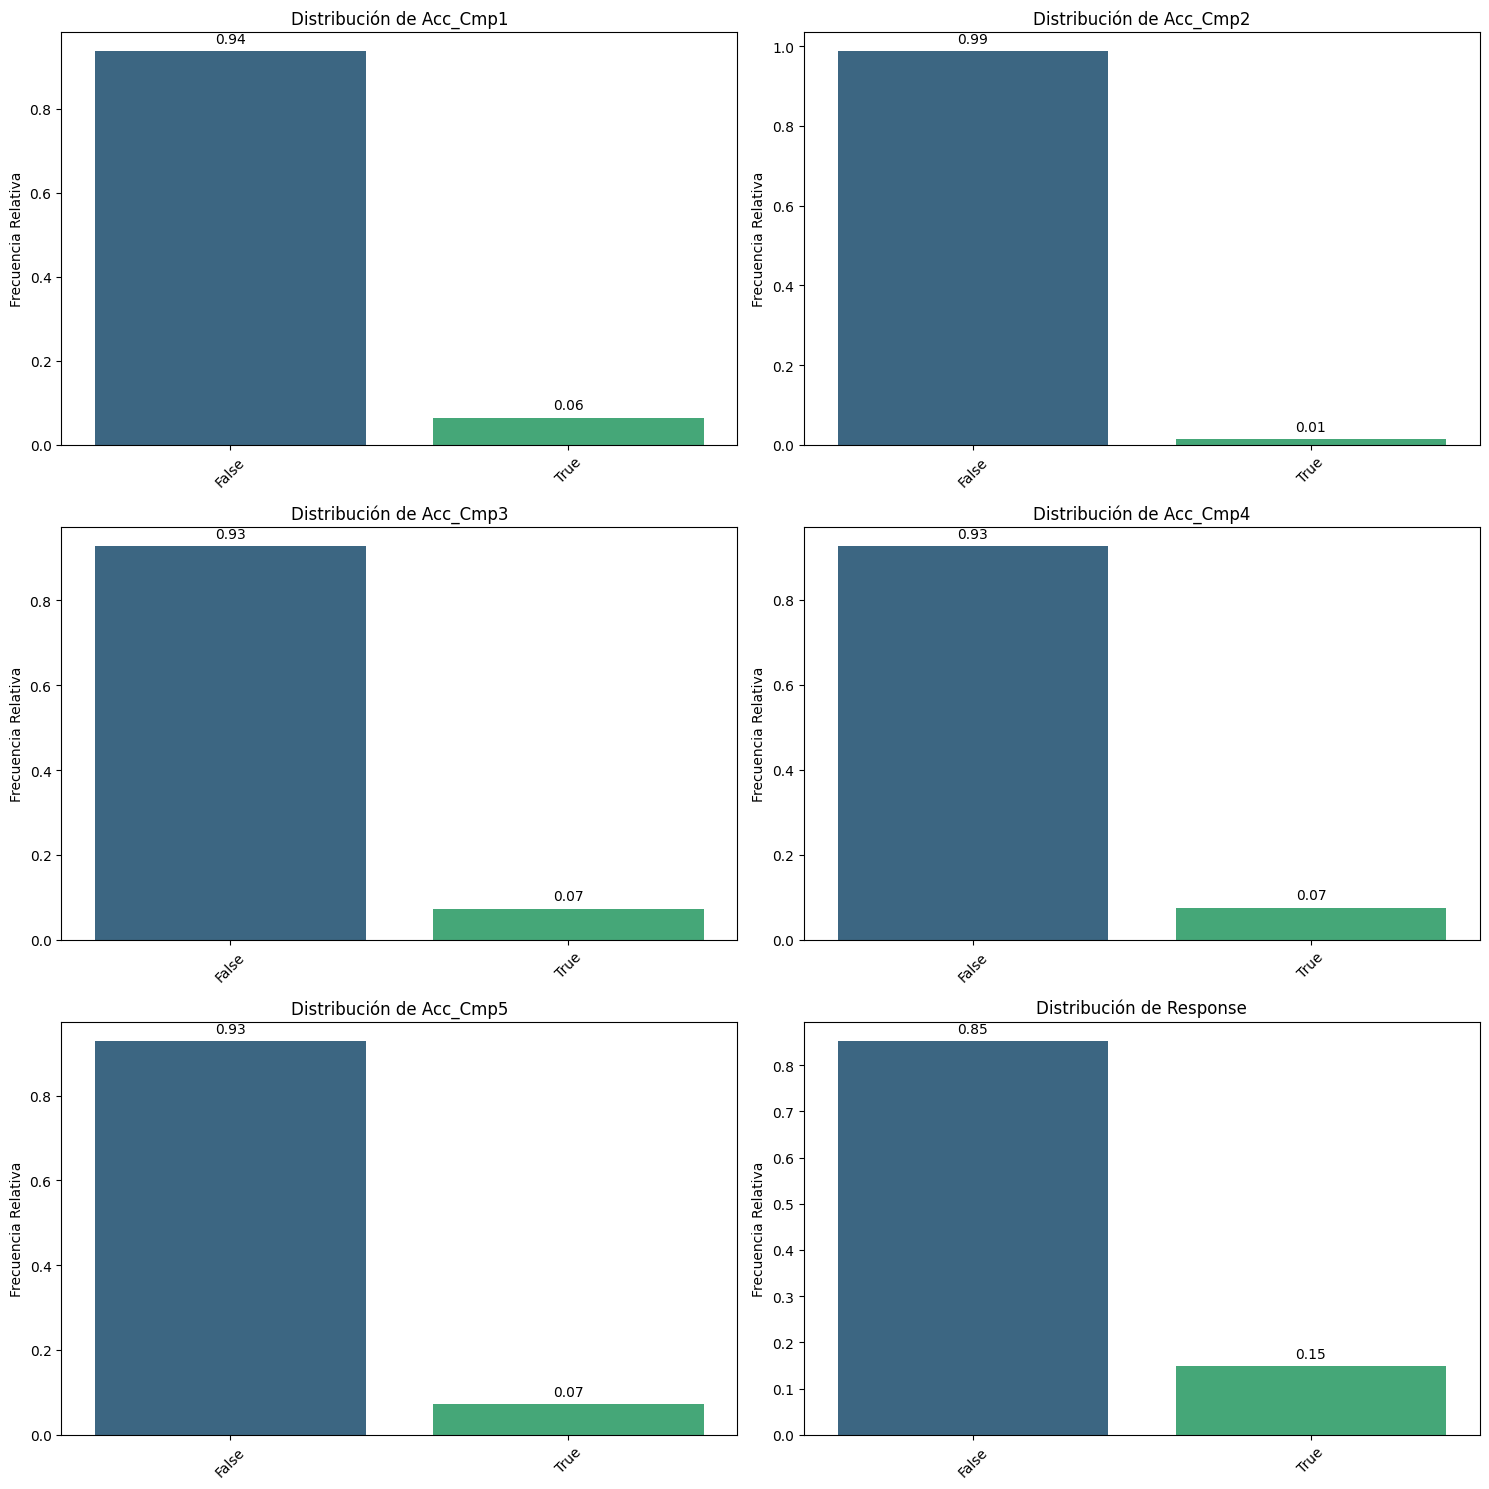

In [15]:
# 4.1.3  Gráficos categoricas_v2
print("Frecuencas ASBSOLUTAS")
pinta_distribucion_categoricas(df, cat_2_PROMO, mostrar_valores= True)

print("Frecuencas RELATIVAS")
pinta_distribucion_categoricas(df, cat_2_PROMO, relativa=True,mostrar_valores= True)

#### COMPLAIN

Frecuencas ASBSOLUTAS


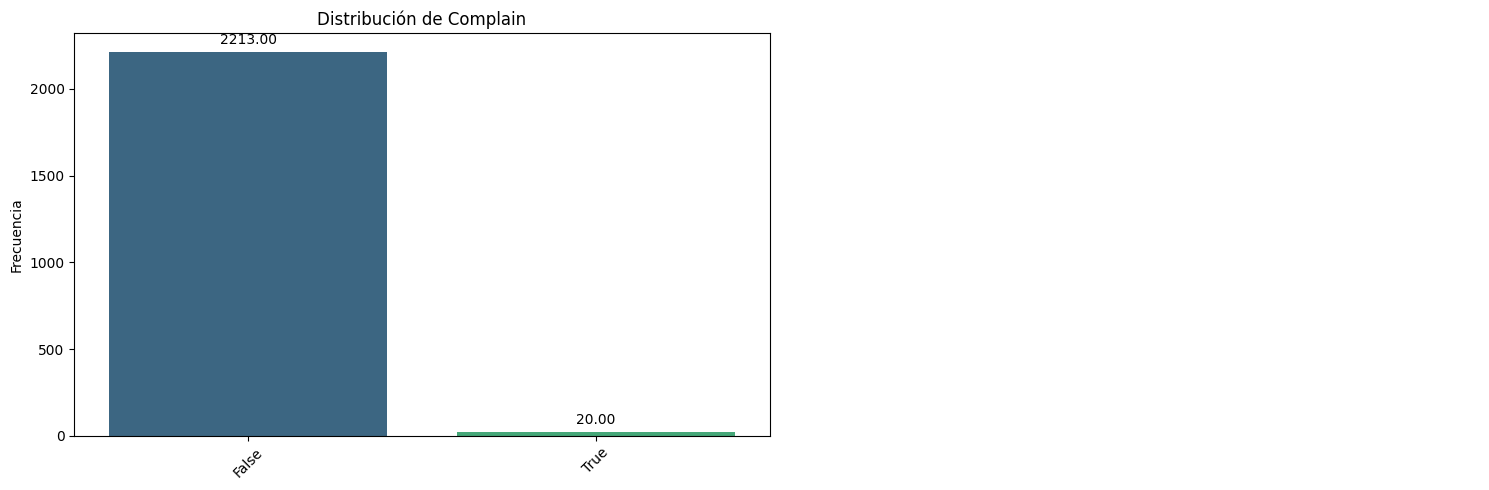

Frecuencas RELATIVAS


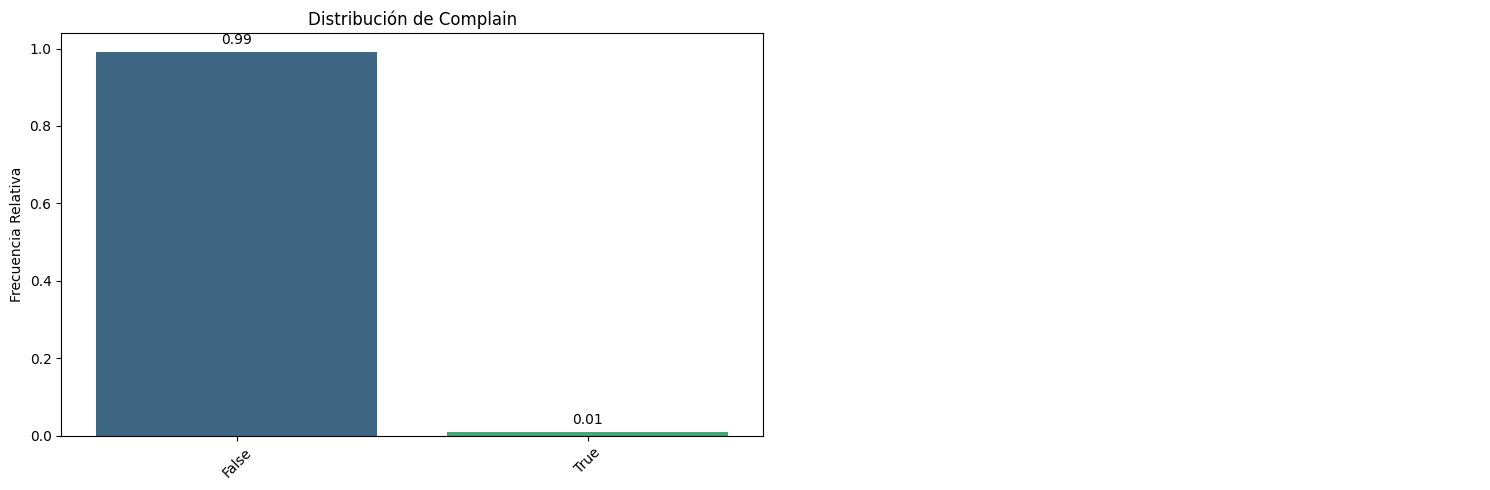

In [16]:
# 4.1.3  Gráficos categoricas_v3
print("Frecuencas ASBSOLUTAS")
pinta_distribucion_categoricas(df, cat_3_OTHER, mostrar_valores= True)

print("Frecuencas RELATIVAS")
pinta_distribucion_categoricas(df, cat_3_OTHER, relativa=True,mostrar_valores= True)

#### PEOPLE: AGE, INCOME, RECENCY

In [17]:
# NUMERICA_1

df[num_1_PEOPLE].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2233.0,55.107479,11.697927,28.0,47.0,54.0,65.0,84.0
Income,2233.0,52212.770264,25057.339402,1730.0,35441.0,51381.5,68281.0,666666.0
Recency,2233.0,49.142409,28.948483,0.0,24.0,49.0,74.0,99.0


In [18]:
# Funcion Coeficiernte de Variacion
def get_CV(df, columna):
    columna = [columna] if type(columna) == str else columna
    return df[columna].describe().T["std"]/df[columna].describe().T["mean"] * 100

In [19]:
get_CV(df, num_1_PEOPLE)

Age        21.227476
Income     47.990825
Recency    58.907333
dtype: float64

In [20]:
# AGE: Variabilidad moderada
# INCOME: alta variabilidad
# RECENCY: alta variabilidad

(3, 2)


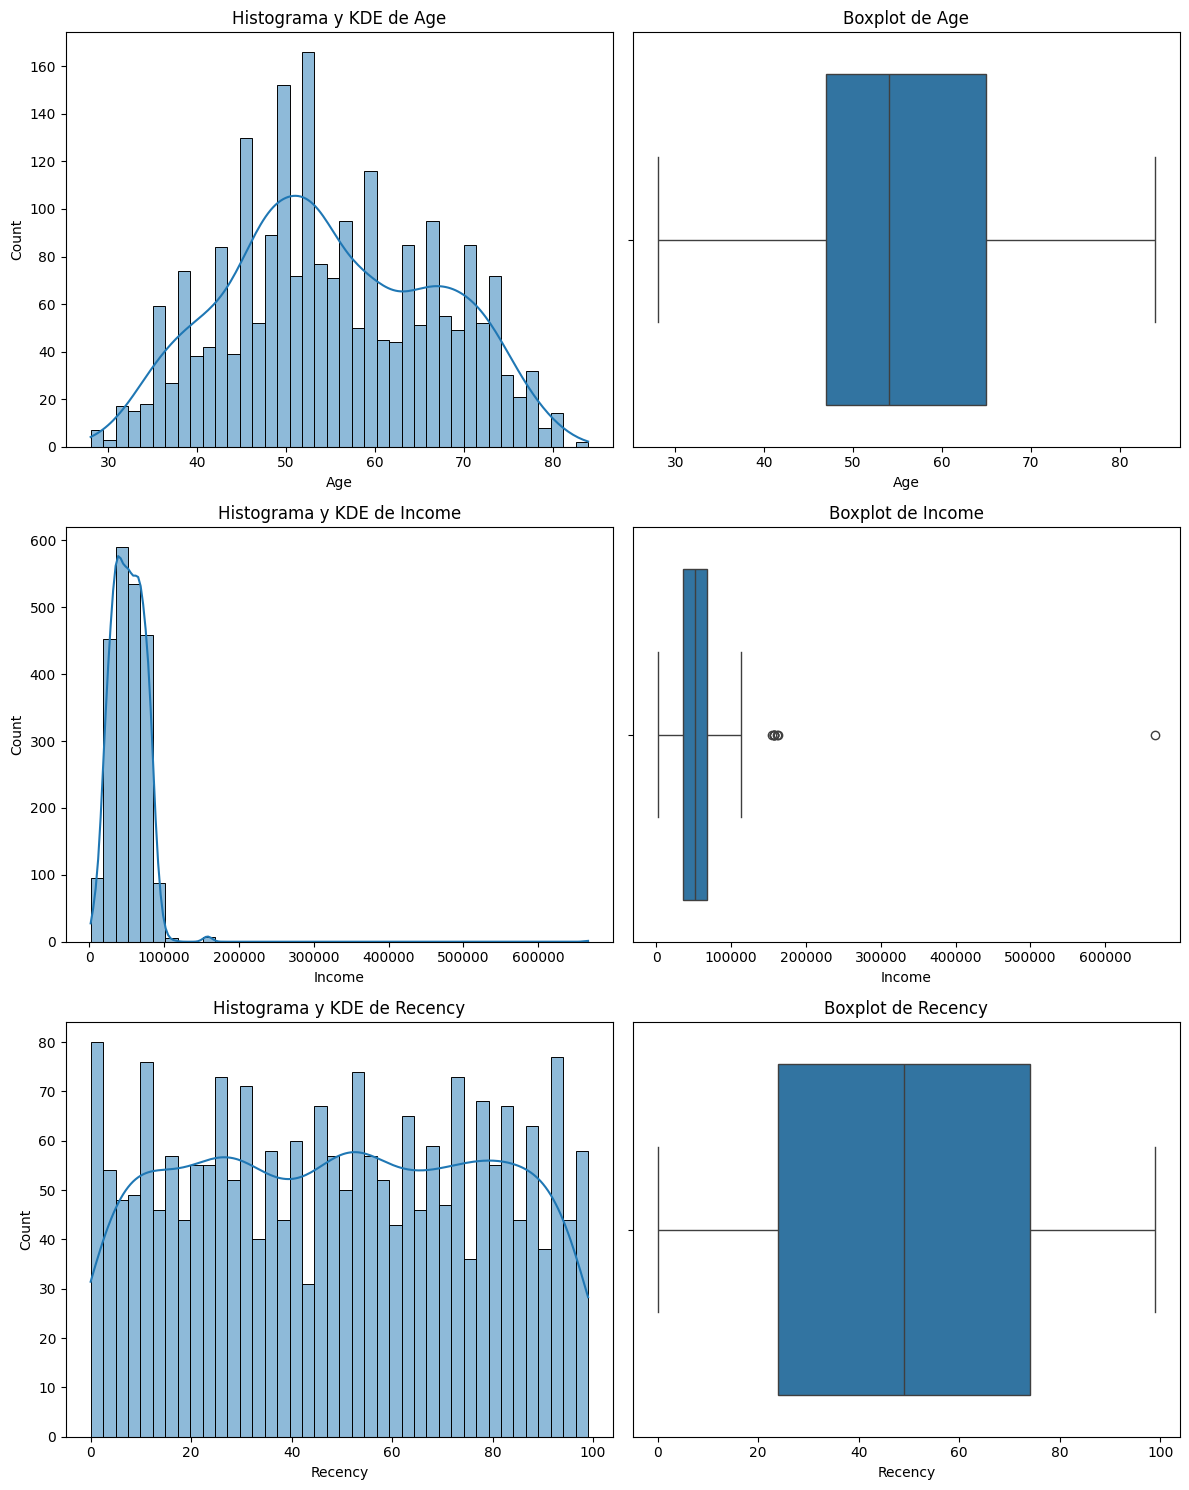

In [21]:
plot_combined_graphs(df, num_1_PEOPLE, whisker_width=2, bins = 40)

(2,)


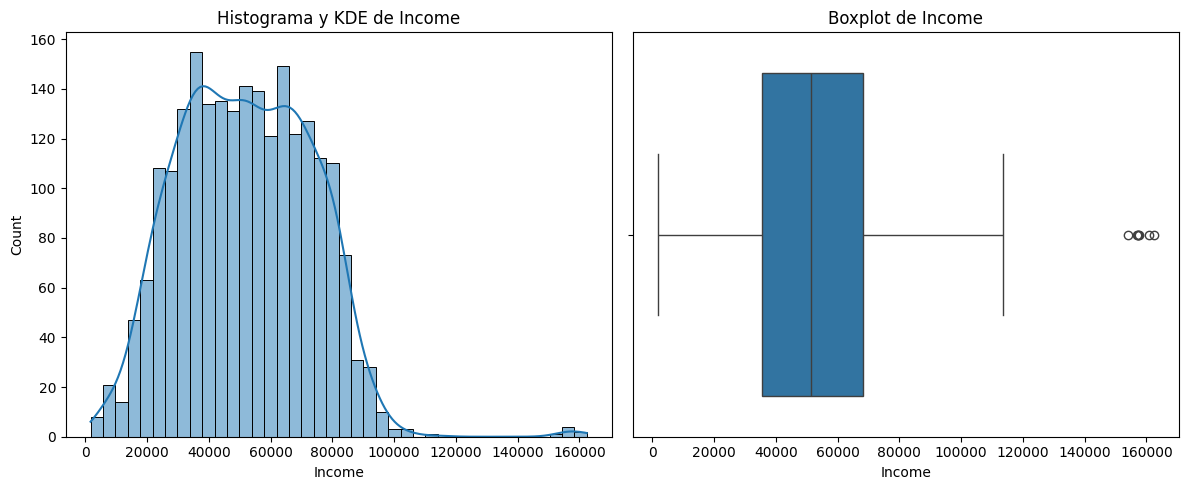

In [22]:
# INCOME sin outlier extremo
backup_v4 = df.copy()
no_outlier = df.loc[df["Income"]<300000]
plot_combined_graphs(no_outlier, ["Income"], whisker_width=2, bins = 40)

***Age***:

Histograma y KDE:
+ Al haber borrado los outliers extremos, la distribución es simetrica
+ La mayoría de los clientes tienen entre 40 y 70 años, con un pico alrededor de los 50 años.

Boxplot:
+ La mediana está alrededor de los 55 años.

***Income***:

Histograma y KDE:
+ La distribución de Income es altamente asimétrica a la derecha
+ La mayoría de los ingresos están concentrados por debajo de los 100,000
+ Hay un outlier importante alrededor de 600,000, que destaca en la cola derecha
+ Al hacer un análisis sin este outlier extremo, la gráfica se normaliza
+ Hay varios outliers, sin ser extremos

Boxplot:
+ Se observa claramente el outlier extremo (ingreso cercano a 600,000)
+ El resto de los datos se distribuyen de forma mucho más compacta

***Recency***:

Histograma y KDE:
+ No se observa una acumulación específica en un rango concreto, lo que indica que las fechas de la última compra de los clientes están distribuidas de manera más o menos equitativa
+ No parece haber valores extremos (outliers) evidentes en esta variable

Boxplot:
+ No se observa una acumulación específica en un rango concreto, lo que indica que las fechas de la última compra de los clientes están distribuidas de manera más o menos equitativa.
+ No parece haber valores extremos (outliers) evidentes en esta variable.

#### PRODUCT: GOLD, MEAT, WINES, FRUITS, SWEETS, FISH, TOTAL_SPENT

In [23]:
# NUMERICA_2
# PRODUCT
df[num_2_PRODUCT].describe()

,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Spent
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,303.933274,26.239140,166.891178,37.402597,27.087326,43.827138,605.380654
std,336.854130,39.703732,225.724334,54.447473,41.314436,51.865500,602.098290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,69.000000
50%,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000
75%,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,1044.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000


In [24]:
# PRODUCT
get_CV(df, num_2_PRODUCT)

Wines          110.831606
Fruits         151.314913
Meat           135.252407
Fish           145.571370
Sweets         152.523121
Gold           118.341061
Total_Spent     99.457802
dtype: float64

(7, 2)


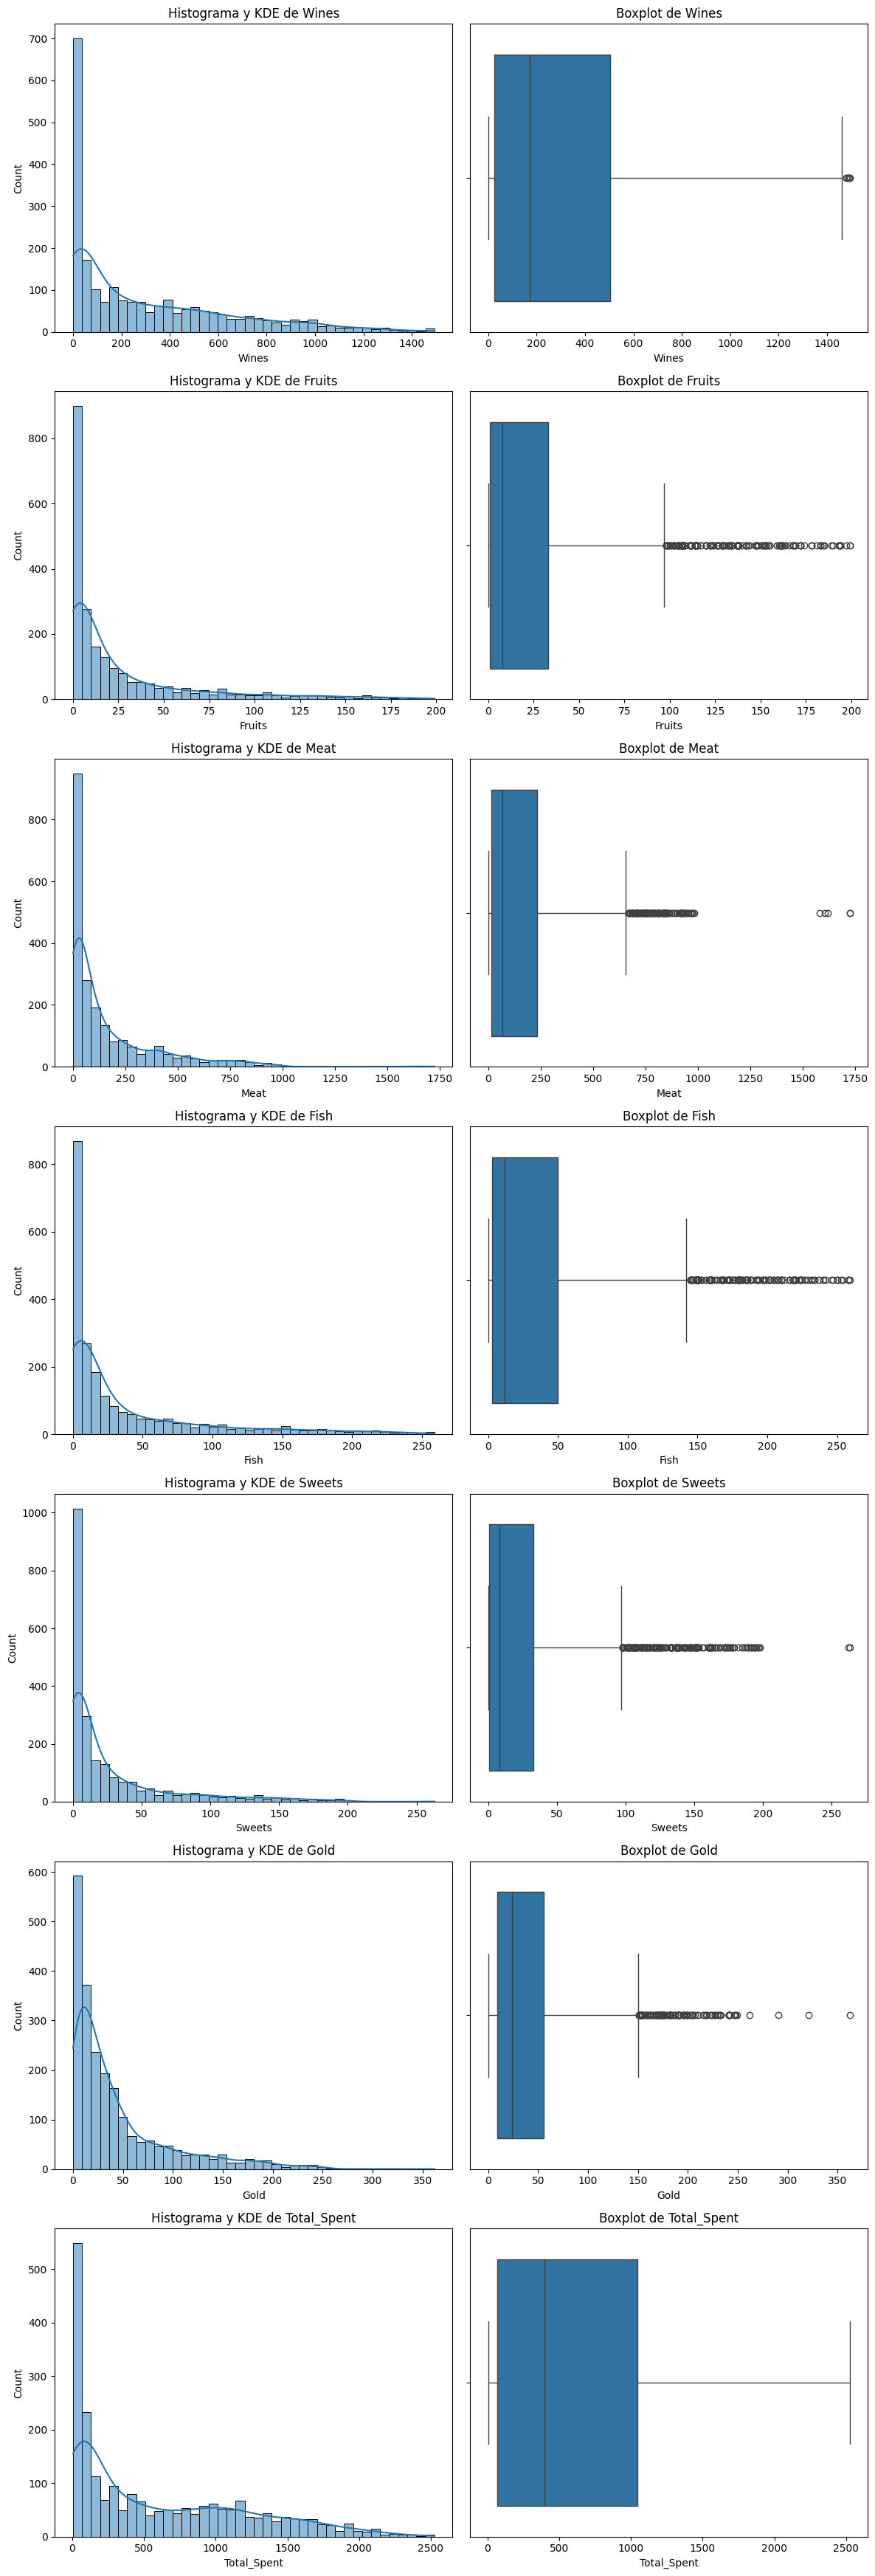

In [25]:
# PRODUCT
plot_combined_graphs(df, num_2_PRODUCT, whisker_width=2, bins = 40)

**Conclusiones Generales**
Distribución similar: 
+ Todas estas variables tienen una distribución sesgada a la derecha, lo que indica que la mayoría de los clientes realizan compras bajas, pero existen valores extremos (outliers) de clientes que compran cantidades significativamente mayores.

Outliers: Son comunes en estas variables, pero:
+ Algunos clientes pueden representar segmentos premium o grandes compradores.
Proporcionan información valiosa para entender el comportamiento de estos clientes.

Notas:
+ Bivariante: relación entre estas variables (por ejemplo, Total_Spent con Income, Gold con Recency)
+ Los valores extremos podrían ser interesantes para identificar clientes de alto valor

#### PLACE: STORE, CATALOG, WEBS, WEB_VISIST

In [26]:
# PLACE
df[num_3_PLACE].describe()

,Store,Catalog,Webs,Web_Visist
count,2233.000000,2233.000000,2233.000000,2233.000000
mean,5.793551,2.659651,4.085087,5.320197
std,3.253742,2.921105,2.780487,2.424492
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,3.000000
50%,5.000000,2.000000,4.000000,6.000000
75%,8.000000,4.000000,6.000000,7.000000
max,13.000000,28.000000,27.000000,20.000000


In [27]:
# PLACE
get_CV(df,num_3_PLACE)

Store          56.161451
Catalog       109.830410
Webs           68.064323
Web_Visist     45.571475
dtype: float64

(4, 2)


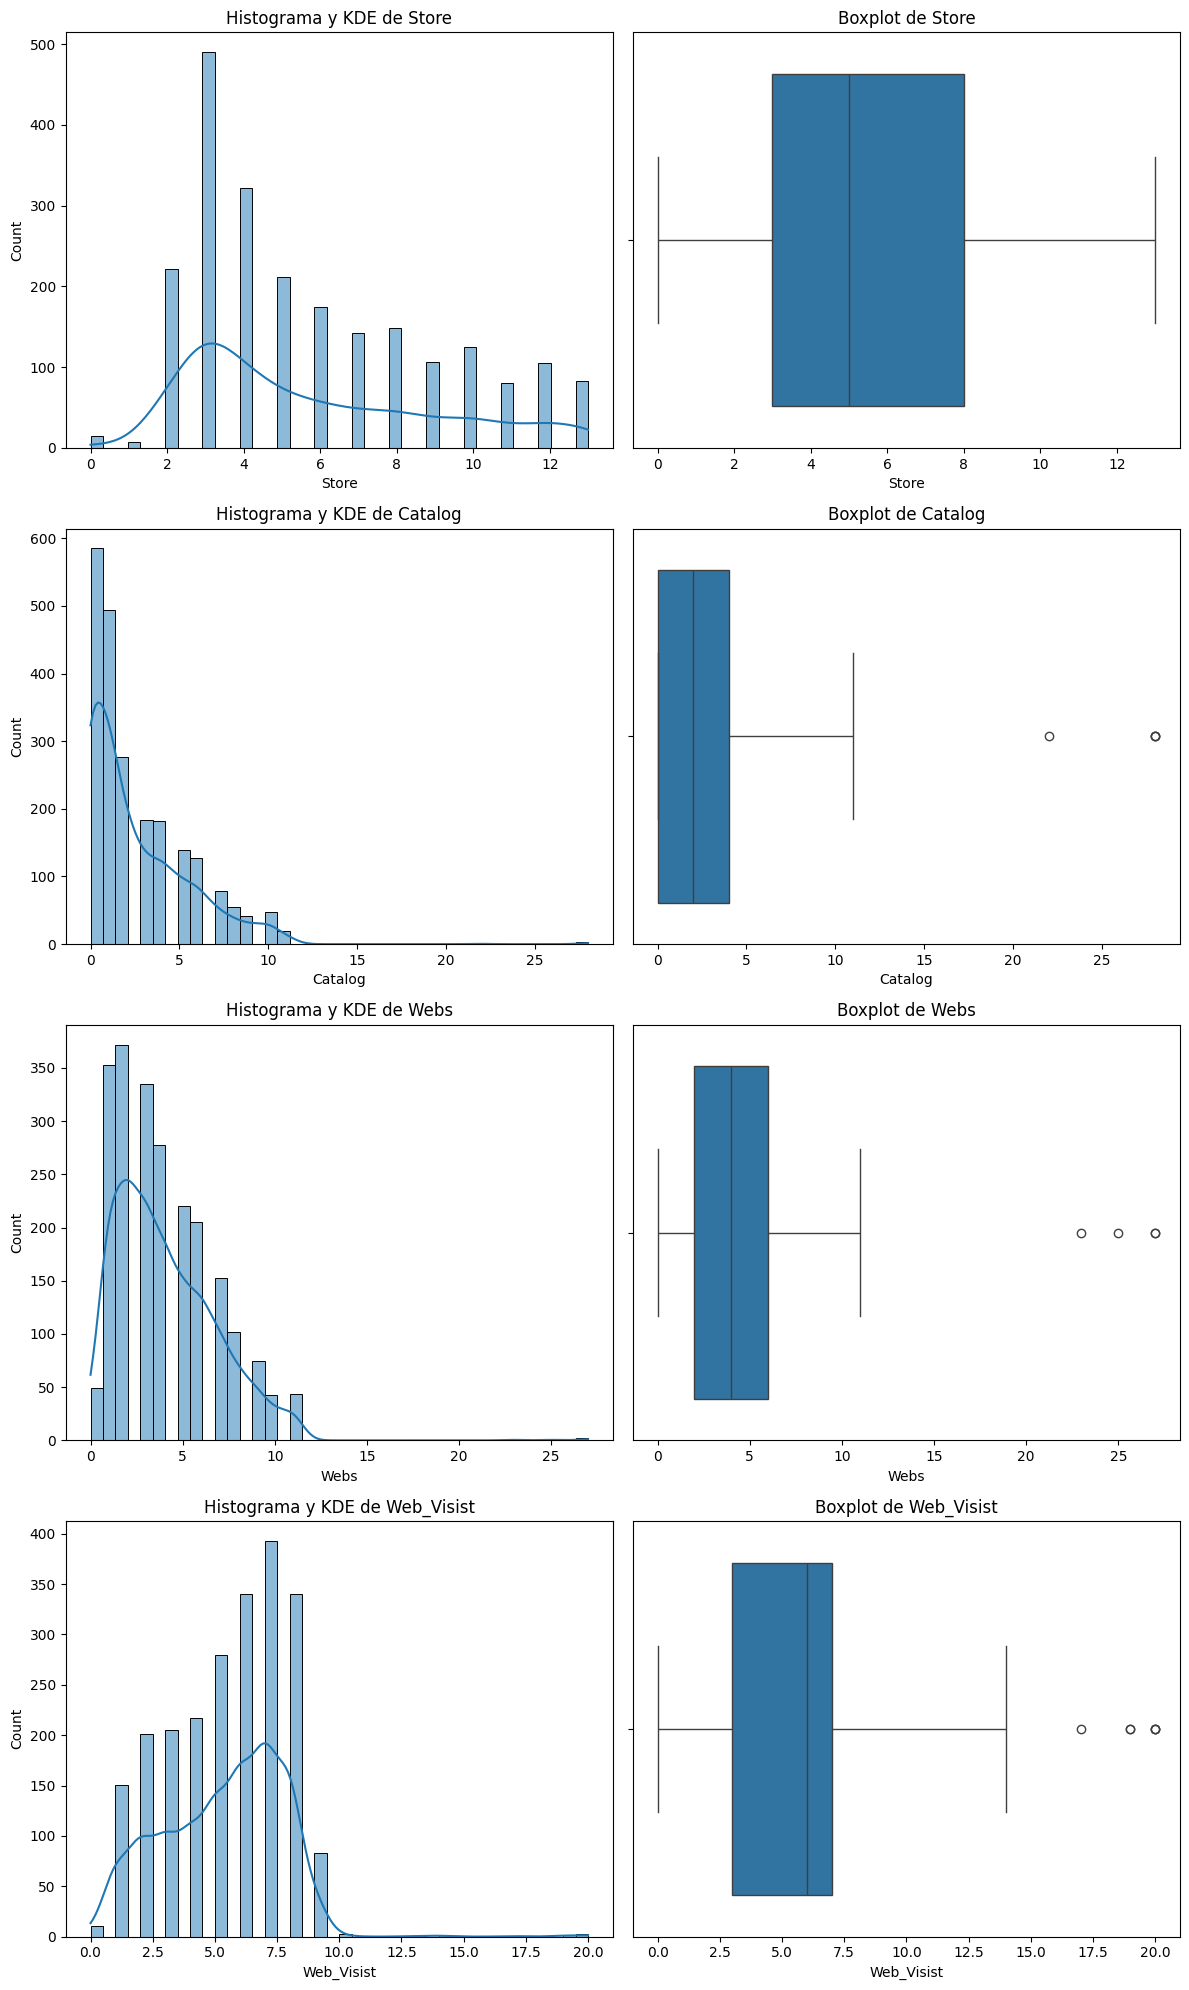

In [28]:
# PLACE
plot_combined_graphs(df, num_3_PLACE, whisker_width=2, bins = 40)